<a href="https://colab.research.google.com/github/omrani-wiem/stage_code_alpha/blob/main/stage_code_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omraniwiem","key":"e983e78f0d942ef7a7773c8b634899ae"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!pip install kaggle

In [3]:
!kaggle datasets download -d mdaliraza/german-credit-data


Dataset URL: https://www.kaggle.com/datasets/mdaliraza/german-credit-data
License(s): CC0-1.0
  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 26.9MB/s]


In [4]:
!ls

german-credit-data.zip	kaggle.json  sample_data


In [5]:
!unzip -o german-credit-data.zip -d ./data

Archive:  german-credit-data.zip
  inflating: ./data/german_credit_data.csv  


In [6]:
!ls ./data

german_credit_data.csv


In [7]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [8]:
import pandas as pd

df = pd.read_csv('./data/german_credit_data.csv')
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [9]:
df = df.drop(columns=['Unnamed: 0'] , errors='ignore')

In [10]:
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [11]:
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')

In [12]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose'])
    ],
    remainder='passthrough'
)

X_encoded = encoder.fit_transform(df)


In [13]:
import pandas as pd

# Récupérer les noms des nouvelles colonnes encodées
encoded_col_names = encoder.named_transformers_['cat'].get_feature_names_out(['Sex', 'Housing', 'Saving accounts' , 'Checking account' , 'Purpose'])

# Récupérer les noms des colonnes non encodées (le reste)
remainder_cols = df.drop(['Sex', 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose'], axis=1).columns

# Construire un DataFrame complet à partir de X_encoded
X_df = pd.DataFrame(X_encoded, columns=list(encoded_col_names) + list(remainder_cols))

# Afficher les 5 premières lignes
print(X_df.head())


   Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0         0.0       1.0           0.0          1.0           0.0   
1         1.0       0.0           0.0          1.0           0.0   
2         0.0       1.0           0.0          1.0           0.0   
3         0.0       1.0           1.0          0.0           0.0   
4         0.0       1.0           1.0          0.0           0.0   

   Saving accounts_little  Saving accounts_moderate  Saving accounts_none  \
0                     0.0                       0.0                   1.0   
1                     1.0                       0.0                   0.0   
2                     1.0                       0.0                   0.0   
3                     1.0                       0.0                   0.0   
4                     1.0                       0.0                   0.0   

   Saving accounts_quite rich  Saving accounts_rich  ...  \
0                         0.0                   0.0  ...   
1       

In [14]:
X_df.head()


,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,67.0,2.0,1169.0,6.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,22.0,2.0,5951.0,48.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,2096.0,12.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45.0,2.0,7882.0,42.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,4870.0,24.0


In [ ]:
#decision trie marche avec classificatio mais lorsque j'ai target c'est a dire avec supervised learning decisiontreeclasifier

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = [ 'Age' , 'Duration', 'Credit amount' ,'Duration']
X_df[cols_to_scale] = scaler.fit_transform(X_df[cols_to_scale])

In [16]:
print(X_df.columns)

Index(['Sex_female', 'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_none', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_none',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Age', 'Job', 'Credit amount', 'Duration'],
      dtype='object')


In [17]:
median_credit = X_df['Credit amount'].median()
X_df['Risk'] = (X_df['Credit amount'] > median_credit).astype(int)
X_df = X_df.drop(columns=['Credit amount'])

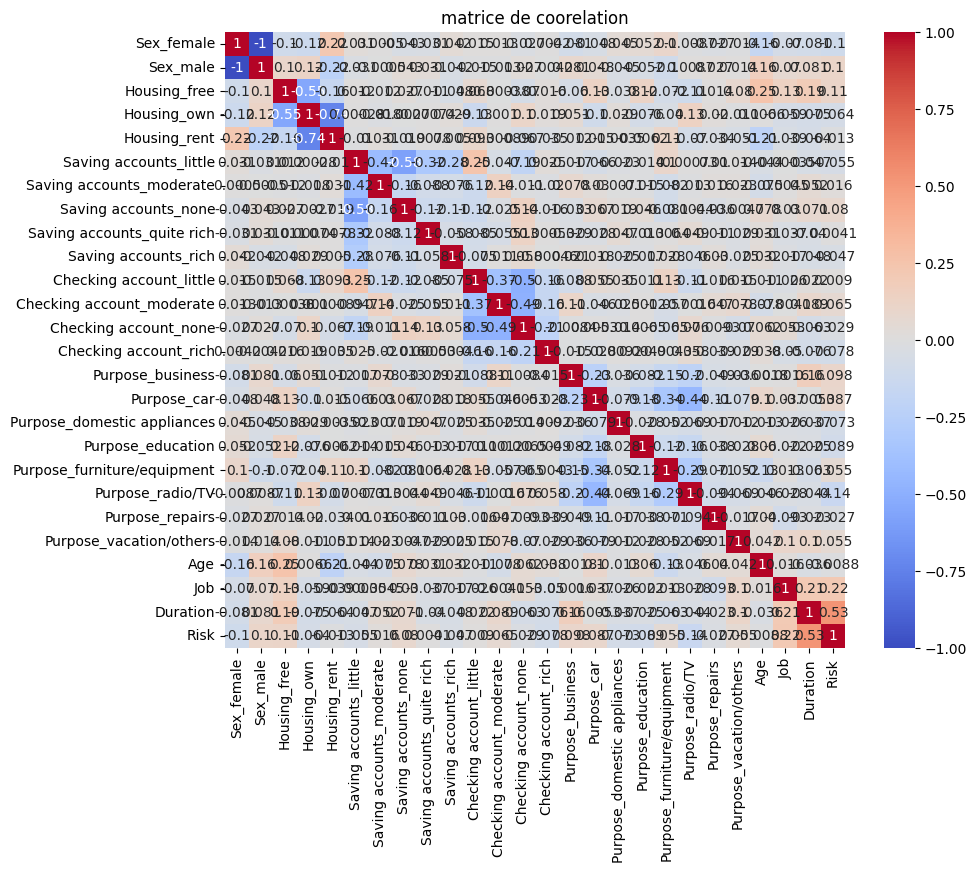

In [18]:
plt.figure(figsize=(10, 8))
correlation = X_df.corr()
sns.heatmap(correlation , annot=True , cmap='coolwarm')
plt.title('matrice de coorelation')
plt.show()

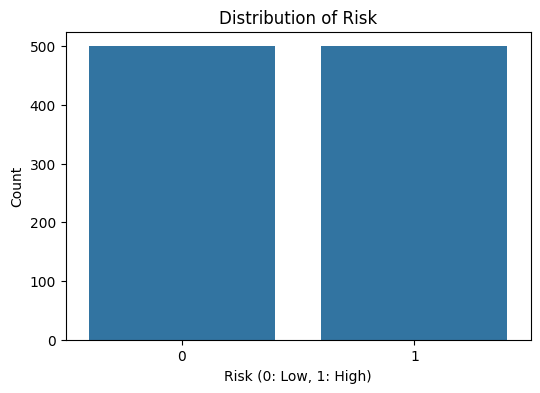

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Risk',data=X_df)
plt.title('Distribution of Risk')
plt.xlabel('Risk (0: Low, 1: High)')
plt.ylabel('Count')
plt.show()

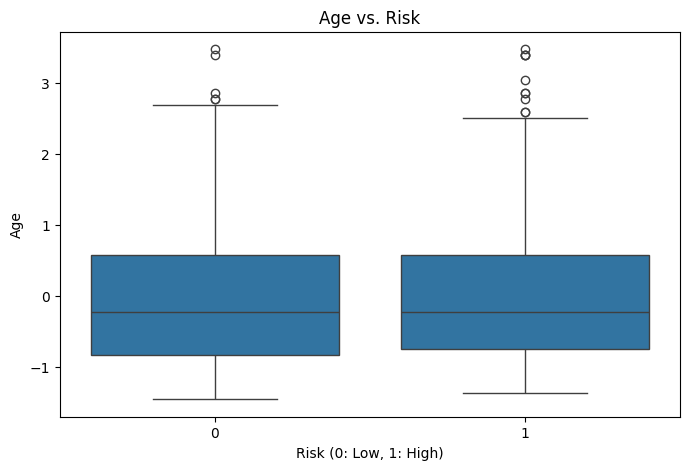

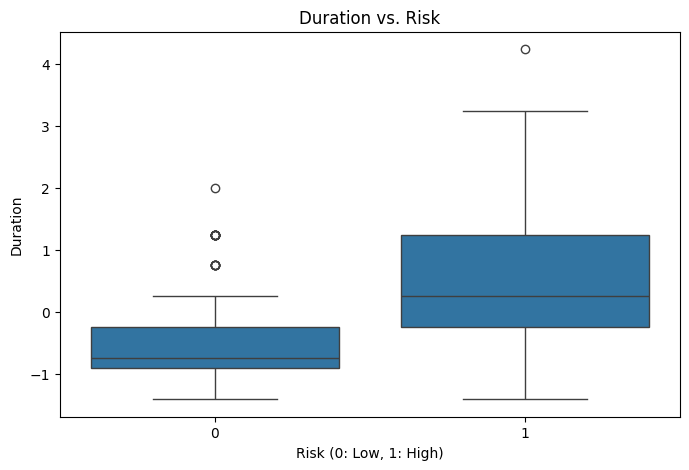

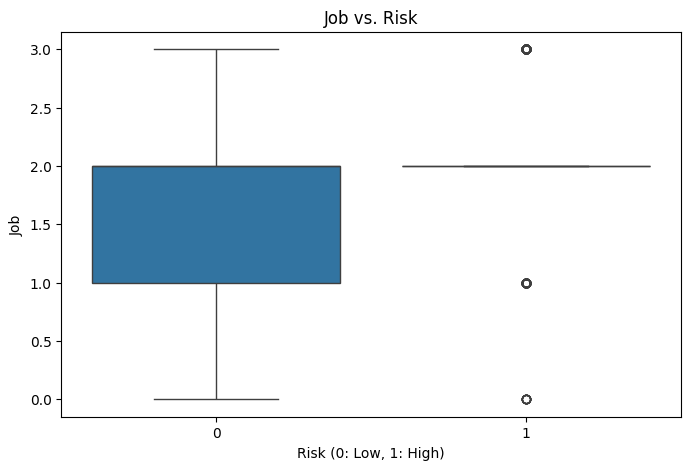

In [20]:
#the relationship between the numerical features ('Age', 'Duration', 'Job') and the target variable 'Risk'
numerical_cols = ['Age', 'Duration', 'Job']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Risk', y=col, data=X_df)
    plt.title(f'{col} vs. Risk')
    plt.xlabel('Risk (0: Low, 1: High)')
    plt.ylabel(col)
    plt.show()

In [21]:
X = X_df.drop(columns=['Risk'])
y = X_df['Risk']

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Prédictions :", y_pred[:5])
print("Probabilités pour la classe positive (Risk=1) :", y_proba[:5])

Prédictions : [0 0 1 1 0]
Probabilités pour la classe positive (Risk=1) : [0.36281591 0.19916733 0.62709048 0.60037058 0.46933613]


In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
classfication_report = classification_report(y_test, y_pred)
confusion_report = confusion_matrix(y_test, y_pred)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)
print("roc_auc:",roc_auc)
print("classfication_report:",classfication_report)
print("confusion_report:",confusion_report)

accuracy: 0.7333333333333333
precision: 0.7536231884057971
recall: 0.6933333333333334
f1: 0.7222222222222222
roc_auc: 0.8068
classfication_report:               precision    recall  f1-score   support

           0       0.72      0.77      0.74       150
           1       0.75      0.69      0.72       150

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

confusion_report: [[116  34]
 [ 46 104]]


In [32]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print("Prédictions :", y_pred[:5])
print("Probabilités pour la classe positive (Risk=1) :", y_proba[:5])
print("Meilleurs paramètres :", grid.best_params_)

Prédictions : [0 0 1 1 0]
Probabilités pour la classe positive (Risk=1) : [0.36281591 0.19916733 0.62709048 0.60037058 0.46933613]
Meilleurs paramètres : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Prédictions :", y_pred[:5])
print("Probabilités pour la classe positive (Risk=1) :", y_proba[:5])

Prédictions : [1 0 0 0 0]
Probabilités pour la classe positive (Risk=1) : [1. 0. 0. 0. 0.]


In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
classfication_report = classification_report(y_test, y_pred)
confusion_report = confusion_matrix(y_test, y_pred)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)
print("roc_auc:",roc_auc)
print("classfication_report:",classfication_report)
print("confusion_report:",confusion_report)

accuracy: 0.6466666666666666
precision: 0.6447368421052632
recall: 0.6533333333333333
f1: 0.6490066225165563
roc_auc: 0.6466666666666667
classfication_report:               precision    recall  f1-score   support

           0       0.65      0.64      0.64       150
           1       0.64      0.65      0.65       150

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300

confusion_report: [[96 54]
 [52 98]]


In [35]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print("Prédictions :", y_pred[:5])
print("Probabilités pour la classe positive (Risk=1) :", y_proba[:5])
print("Meilleurs paramètres :", grid.best_params_)


Prédictions : [0 0 1 1 0]
Probabilités pour la classe positive (Risk=1) : [1. 0. 0. 0. 0.]
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
#RandomForest

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Prédictions :", y_pred[:5])
print("Probabilités pour la classe positive (Risk=1) :", y_proba[:5])

Prédictions : [1 0 0 0 0]
Probabilités pour la classe positive (Risk=1) : [0.73 0.11 0.41 0.36 0.24]


In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
classfication_report = classification_report(y_test, y_pred)
confusion_report = confusion_matrix(y_test, y_pred)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)
print("roc_auc:",roc_auc)
print("classfication_report:",classfication_report)
print("confusion_report:",confusion_report)

accuracy: 0.72
precision: 0.7357142857142858
recall: 0.6866666666666666
f1: 0.7103448275862069
roc_auc: 0.7800888888888889
classfication_report:               precision    recall  f1-score   support

           0       0.71      0.75      0.73       150
           1       0.74      0.69      0.71       150

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

confusion_report: [[113  37]
 [ 47 103]]


In [38]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print("Prédictions :", y_pred[:5])
print("Probabilités pour la classe positive (Risk=1) :", y_proba[:5])
print("Meilleurs paramètres :", grid.best_params_)


Prédictions : [0 0 1 1 0]
Probabilités pour la classe positive (Risk=1) : [0.73 0.11 0.41 0.36 0.24]
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
